# Python Básico para Física Experimental

* Nesse notebook, eu coloquei um exemplo básico de como plotar e ajustar os dados contidos em um arquivo chamado "data.txt" (que está na mesma pasta onde esse notebook está salvo). Você pode dar uma olhada nesse arquivo para ver como ele está configurado.


* Se você não for rodar esse script em um notebook do Jupyter, apague a primeira linha `%matplotlib notebook`, que serve para visualizar os gráficos em modo interativo no Jupyter.


* Por enquanto, eu estou disponibilizando só esse script, com o que eu acho que seria o básico mesmo. Assim que possível, eu pretendo adicionar outros conteúdos e explicar um pouco melhor, passo a passo.

<IPython.core.display.Javascript object>


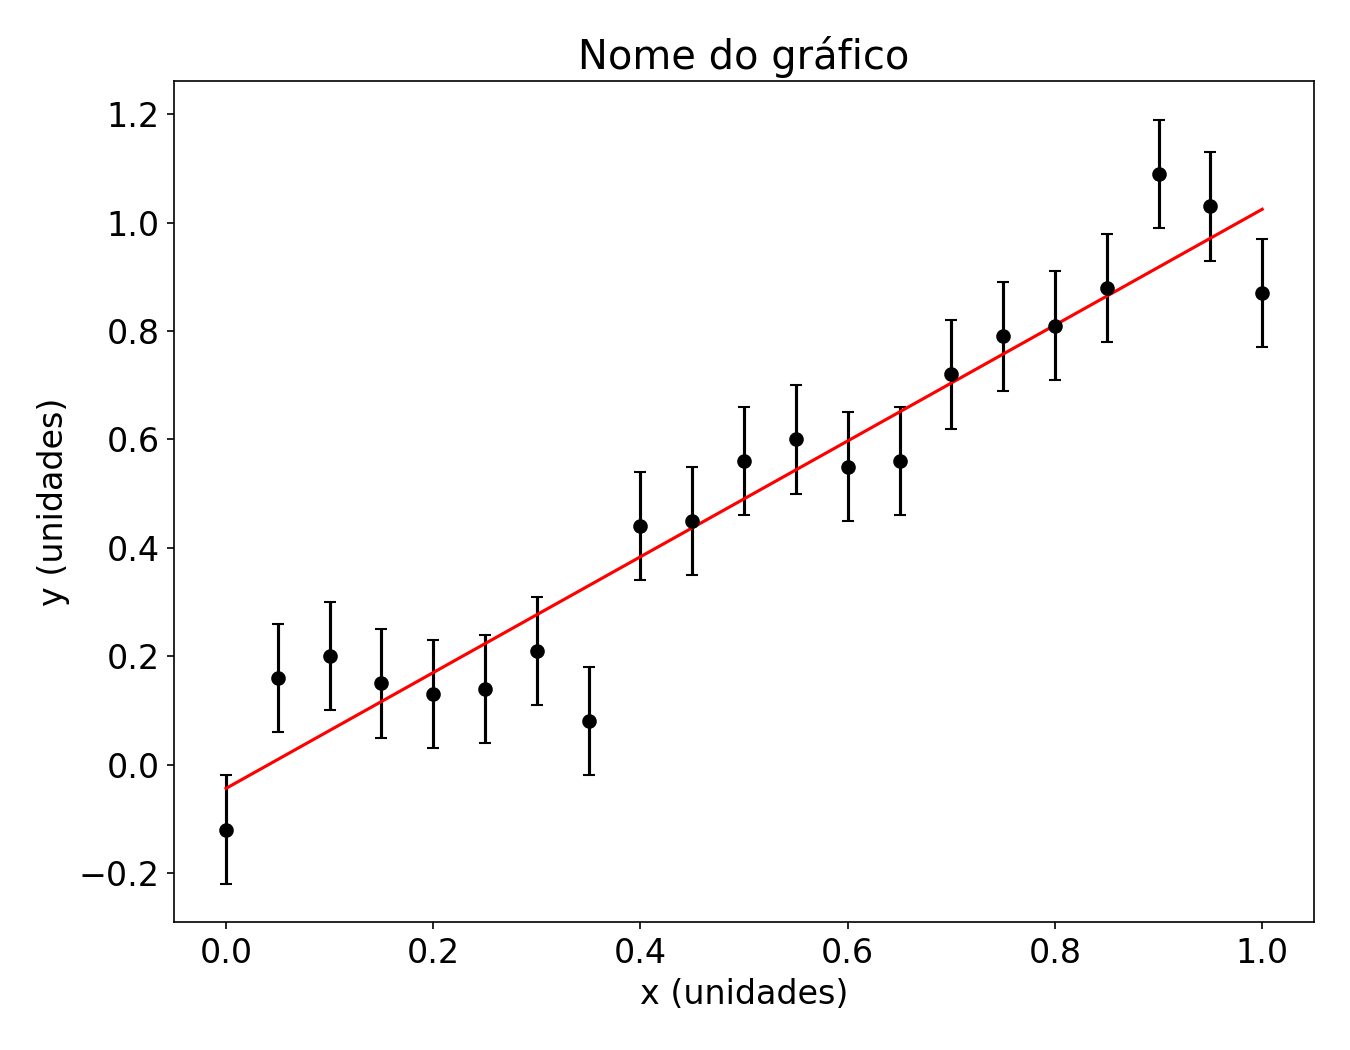

Parâmetros optimizados:  [ 1.06857143 -0.04380952]
Erro nos parâmetros:  [0.07472782 0.0436801 ]
Chi quadrado:  20.424380952380957
Graus de liberdade:  19
Matriz de covariância: 
 [[ 0.00558425 -0.00279212]
 [-0.00279212  0.00190795]]


In [2]:
# Esse comando, no Jupyter, permite visualizar as figuras no modo interativo:
%matplotlib notebook

import numpy as np                           # Biblioteca para lidar com "arrays"
import pandas as pd                          # Biblioteca para lidar com "data frames"
import matplotlib.pyplot as plt              # Biblioteca para plotar os dados
from scipy.optimize import curve_fit as fit  # Função que vamos usar para os ajustes


# Vamos definir aqui a função de ajuste (No caso dos dados de exemplo, será uma reta):
def f(x, a, b):
    y = a*x + b
    return y


# Vamos carregar os dados do arquivo 'data.txt', que está salvo na mesma pasta desse programa:
# No arquivo data.txt, podemos ver que ele é separado por tab e usa pontos nos decimais, então
# temos sep='\t' e decimal='.', mas você pode mudar isso se seu arquivo for diferente
data = pd.read_csv('data.txt', sep='\t', decimal='.')


# Já que vamos usar bastante esses valores, vamos salvar em variáveis:
# Note que entre colchetes estão o nome das colunas, definidos na primeira linha
# do arquivo data.txt que carregamos acima.
x     = data['x']
y     = data['y']
y_err = data['y_err']


# Vamos criar a figura onde vamos plotar os dados:
# O nome da figura é para referência, não vai aparecer no gráfico
# Podemos ajustar o tamanho da figura com figsize=[largura, altura]
plt.figure('Nome da Figura', figsize=[9, 7])
# E usar esse comando para ajustar o mesmo tamanho para todas as fontes:
plt.rcParams.update({'font.size': 16})


# Vamos plotar os dados, com as barras de erro:
# Em fmt='o', eu escolhi bolinhas como marcadores
# Em capsize=3, eu escolhi o tamanho dos tracinhos nos limites das barras de erro
plt.errorbar(x, y, y_err, color='black', fmt='o', capsize=3)


# Queremos também plotar o ajuste, mas precisamos calculá-lo primeiro:
# f é a função que nós definimos lá em cima
# Se você quiser ajudar com um chute, é só colocar como "(p0, p1, ...)" no lugar de None
# popt será uma lista com o valor optimizado dos parâmetros
# pcov será a matriz de covariância
popt, pcov = fit(f, x, y, sigma=y_err, p0=None)
# Calcula os erros dos parâmetros como a raiz quadrada dos elementos da diagonal de pcov:
perr = np.sqrt(np.diag(pcov))
# Calcula os resíduos:
r = y - f(x, *popt)
# Calcula o chi quadrado:
chisq = sum((r / y_err)**2)
# Calcula o número de graus de liberdade:
df = len(x) - len(popt)


# Vamos plotar o ajuste no mesmo gráfico:
plt.plot(x, f(x, *popt), color='red')


# E dar um nome aos eixos e à figura:
plt.xlabel('x (unidades)')
plt.ylabel('y (unidades)')
plt.title('Nome do gráfico')
# Usar esse comando para optimizar o gráfico na área da figura:
plt.tight_layout()
# E esse comando para mostrar a figura:
plt.show()


# Por fim, vamos printar os resultados:
print('Parâmetros optimizados: ', popt)
print('Erro nos parâmetros: ', perr)
print('Chi quadrado: ', chisq)
print('Graus de liberdade: ', df)
print('Matriz de covariância: \n', pcov)